K=3 Clustering and ARI:
Adjusted Rand Index for k=3: 0.7009

Plotting elbow curve to justify optimal k...


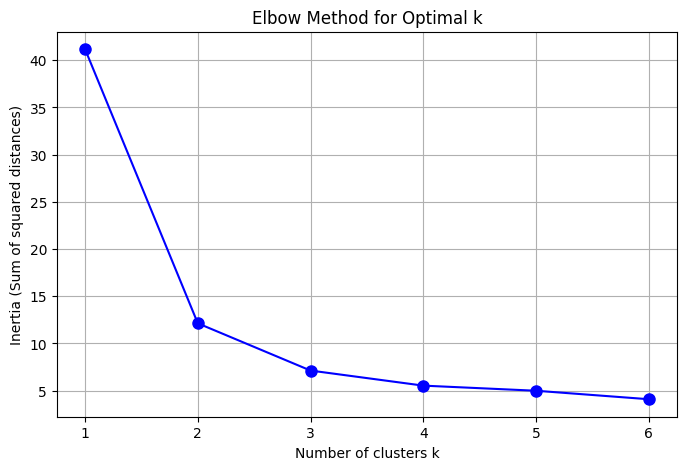


Plotting clusters scatter plot for k=3...


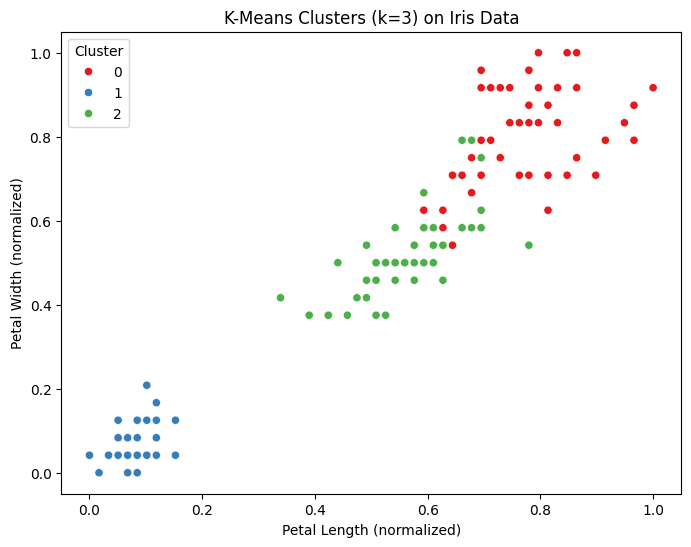

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and preprocess Iris data 
def load_and_preprocess():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['species'] = iris.target
    
    # Normalize features
    features = iris.feature_names
    scaler = MinMaxScaler()
    df[features] = scaler.fit_transform(df[features])
    
    return df, features, iris.target

# 1. K-Means clustering and ARI evaluation for k=3
def kmeans_clustering(df, features, true_labels, k=3):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df[features])
    cluster_labels = model.labels_
    
    ari = adjusted_rand_score(true_labels, cluster_labels)
    print(f"Adjusted Rand Index for k={k}: {ari:.4f}")
    return model, cluster_labels, ari

# 2. Elbow method to choose optimal k
def plot_elbow_curve(df, features, max_k=10):
    inertia = []
    K = range(1, max_k+1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df[features])
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8,5))
    plt.plot(K, inertia, 'bo-', markersize=8)
    plt.xlabel('Number of clusters k')
    plt.ylabel('Inertia (Sum of squared distances)')
    plt.title('Elbow Method for Optimal k')
    plt.xticks(K)
    plt.grid(True)
    plt.savefig("elbow_curve.png")
    plt.show()

# 3. Visualize clusters: petal length vs petal width colored by cluster
def plot_clusters(df, cluster_labels):
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        x='petal length (cm)', y='petal width (cm)',
        hue=cluster_labels, palette='Set1', data=df, legend='full'
    )
    plt.title('K-Means Clusters (k=3) on Iris Data')
    plt.xlabel('Petal Length (normalized)')
    plt.ylabel('Petal Width (normalized)')
    plt.legend(title='Cluster')
    plt.savefig("clusters_scatter.png")
    plt.show()

def main():
    df, features, true_labels = load_and_preprocess()
    
    # K=3 clustering and ARI
    print("K=3 Clustering and ARI:")
    model, cluster_labels, ari = kmeans_clustering(df, features, true_labels, k=3)
    
    # Experiment with k=2 and k=4, plot elbow curve
    print("\nPlotting elbow curve to justify optimal k...")
    plot_elbow_curve(df, features, max_k=6)
    
    # Visualize clusters for k=3
    print("\nPlotting clusters scatter plot for k=3...")
    plot_clusters(df, cluster_labels)
    
if __name__ == "__main__":
    main()
